In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(platetools)))
suppressWarnings(suppressPackageStartupMessages(library(gridExtra)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))

In [2]:
# import csv file
df <- read.csv(
    "./results/regression/PBMC/aggregated_with_nomic/DMSO_0.100_DMSO_0.025__LPS_100.000_DMSO_0.025/model_stats.csv", 
    )
head(df,2)

df_var <- read.csv(
    "./results/regression/PBMC/aggregated_with_nomic/DMSO_0.100_DMSO_0.025__LPS_100.000_DMSO_0.025/variance_r2_stats.csv"
)
head(df_var,2)


enet_cp_fig <- "./figures/regression/PBMC/aggregated_with_nomic/DMSO_0.100_DMSO_0.025__LPS_100.000_DMSO_0.025/enet_cp.pdf"
# if path does not exist, create it
if (!file.exists(dirname(enet_cp_fig))) {
    print(dirname(enet_cp_fig))
    dir.create(dirname(enet_cp_fig), recursive = TRUE)
}


,explained_variance,neg_mean_absolute_error,neg_mean_squared_error,well,treatment,r2,cytokine,data_split,shuffle,predicted_value,actual_value,log10_neg_mean_absolute_error,log10_neg_mean_squared_error,log10_explained_variance
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-0.1588166,-0.02522272,B07,DMSO_0.100_DMSO_0.025,0.9545992,ActivinA,train_data,final,0.07040643,0.06111581,0.7991041,1.598208,0
2,1,-0.1903878,-0.03624751,C06,DMSO_0.100_DMSO_0.025,0.9545992,ActivinA,train_data,final,0.12109700,0.06451266,0.7203609,1.440722,0


,cytokine,data_split,shuffle,predicted_value,actual_value,r2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,AA,test_data,final,0,0.007450766,[-1.10878122e-06]
2,AA,train_data,final,0,0.003745929,[0.]


In [3]:
print(unique(df$shuffle))
print(unique(length(df$cytokine)))

[1] "final"             "shuffled_baseline"
[1] 3740


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


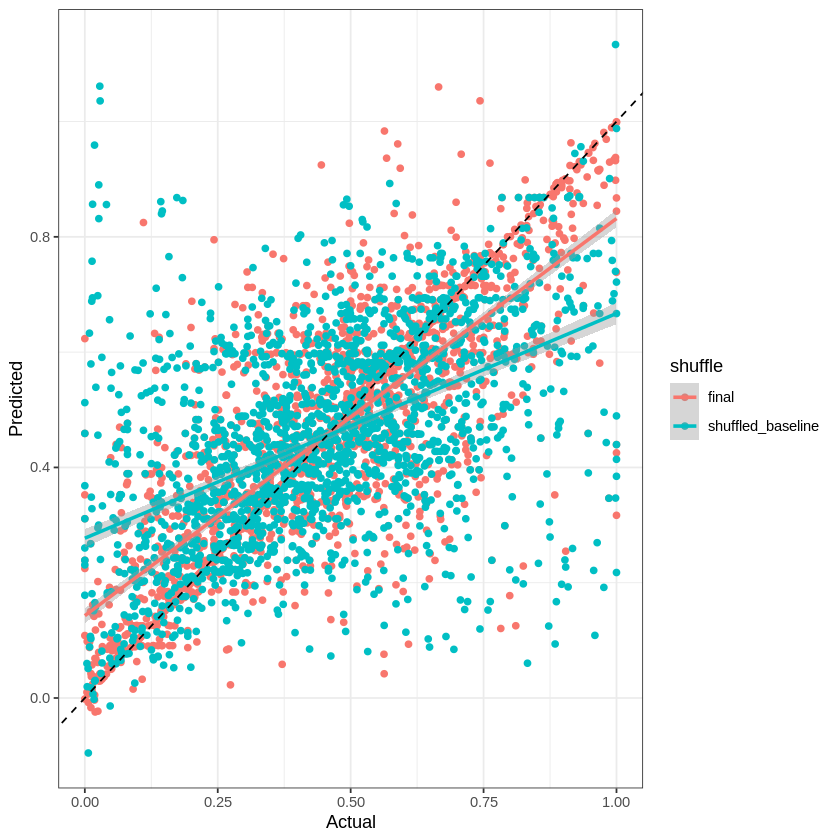

In [4]:
# set output path
global_prediction_trend_path <- "./figures/regression/PBMC/aggregated_with_nomic/DMSO_0.100_DMSO_0.025__LPS_100.000_DMSO_0.025/global_prediction_trend.png"
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
# plot the data
global_prediction_trend <- (
    ggplot(df, aes(x=actual_value, y=predicted_value, col=shuffle)) 
    + geom_point() 
    + geom_smooth(method=lm, se=TRUE,) 
    + labs(x="Actual", y="Predicted") 
    + theme_bw()
    # add y=x line
    + geom_abline(intercept = 0, slope = 1, linetype="dashed", color="black")
)

# save the plot
ggsave(global_prediction_trend_path, global_prediction_trend, width=5, height=5, dpi=500)
global_prediction_trend

In [5]:
pdf(file=enet_cp_fig)
# set plot size
options(repr.plot.width=6, repr.plot.height=8)
# facet by secrete 
for (i in 1:length(unique(df$cytokine))){
    sub_df <- df[df$cytokine == (unique(df$secrete)[i]),]
    p <- (
        ggplot(sub_df, aes(x=actual_value, y=predicted_value, col=shuffle)) 
        + geom_point() 
        + geom_smooth(method=lm, se=TRUE) 
        + labs(x="Actual", y="Predicted") 
        + theme_bw() 
        + ggtitle(unique(df$cytokine)[i])
        + ylim(0, 1)
        + xlim(0, 1)

    )
    
    plot(p)
}
dev.off()


png 
  2

In [6]:
# remove '[]' from the string in the column
df_var$r2 <- gsub("\\[|\\]", "", df_var$r2)
# set the column as numeric
df_var$r2 <- as.numeric(df_var$r2)
head(df_var)

,cytokine,data_split,shuffle,predicted_value,actual_value,r2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,AA,test_data,final,0,0.007450766,-1.108781e-06
2,AA,train_data,final,0,0.003745929,0.000000e+00
3,AITRL(GITRLigand),test_data,final,0,0.019164715,-7.769130e-03
4,AITRL(GITRLigand),train_data,final,0,0.030975400,0.000000e+00
5,APRIL,test_data,final,0,0.089646295,-1.798813e-01
6,APRIL,train_data,final,0,0.024361073,0.000000e+00


Warning message:
“Removed 395 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 395 rows containing missing values (`geom_point()`).”


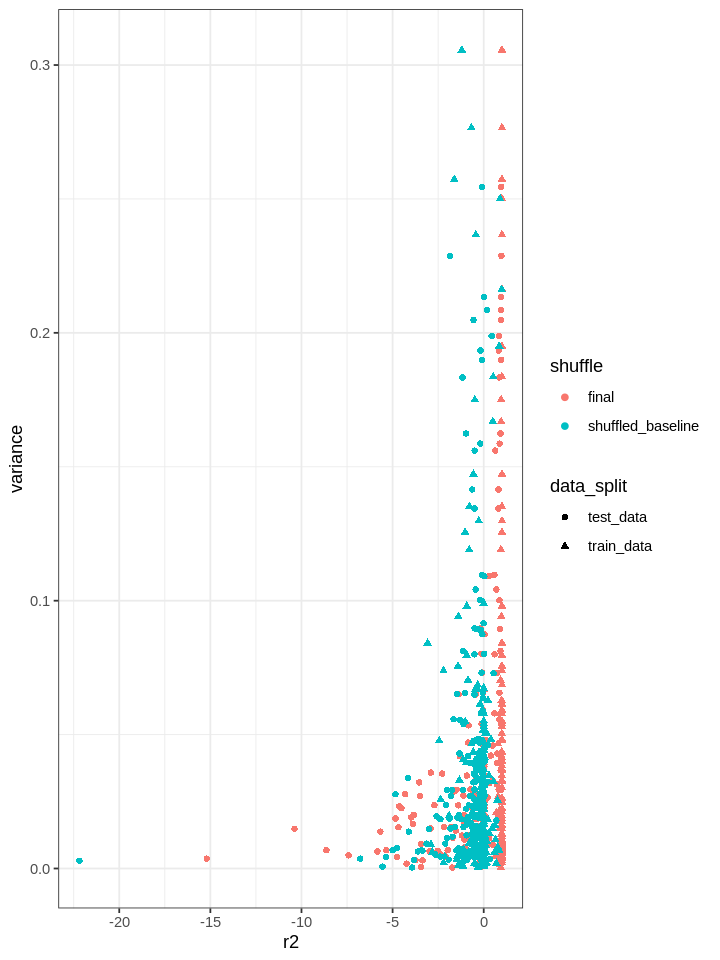

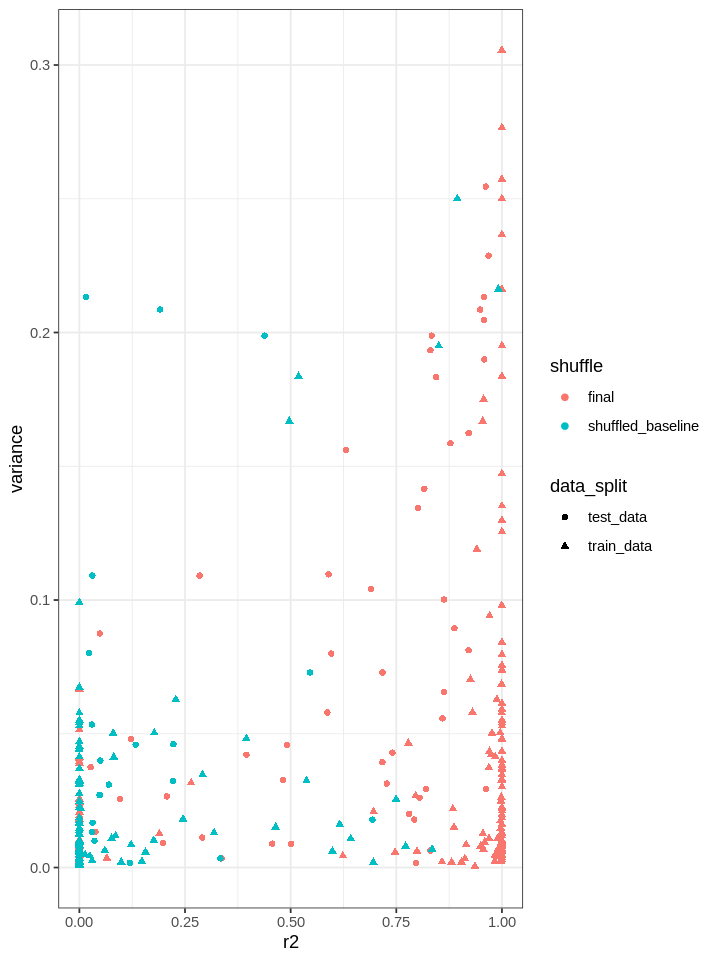

In [7]:
# set output path
global_variance_r2_path <- "./figures/regression/PBMC/aggregated_with_nomic/DMSO_0.100_DMSO_0.025__LPS_100.000_DMSO_0.025/global_variance_r2.png"
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
# plot df_var df
variance_r2_plot <- (
    ggplot(df_var, aes(x=r2, y=actual_value,col=shuffle, shape = data_split)) 
    + geom_point() 
    # + geom_smooth(method=lm, se=TRUE) 
    + labs(x="r2", y="variance") 
    + theme_bw()
)
ggsave(global_variance_r2_path, variance_r2_plot, width=5, height=5, dpi=500)
variance_r2_plot

local_variance_r2_path <- "./figures/regression/PBMC/aggregated_with_nomic/DMSO_0.100_DMSO_0.025__LPS_100.000_DMSO_0.025/local_variance_r2.png"
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
# same plot but only in the positive quadrant
variance_r2_plot <- (
    ggplot(df_var, aes(x=r2, y=actual_value, col=shuffle, shape = data_split)) 
    + geom_point() 
    + labs(x="r2", y="variance") 
    + theme_bw()
    + xlim(0, max(df_var$r2))
    + ylim(0, max(df_var$actual_value))
)
ggsave(local_variance_r2_path, variance_r2_plot, width=5, height=5, dpi=500)
variance_r2_plot

In [8]:
# calculate the se of each metric for each shuffle, data_split, and cytokine in R
agg_df <- aggregate(log10_neg_mean_absolute_error ~ shuffle + data_split + cytokine, df, function(x) c(mean = mean(x), sd = sd(x)))
# aggregate(log10_neg_mean_absolute_error ~ shuffle + data_split + cytokine, df, mean)
# split the log10_neg_mean_absolute_error column into two columns
agg_df <- cbind(agg_df, agg_df$log10_neg_mean_absolute_error)
# remove the log10_neg_mean_absolute_error column by name
agg_df <- agg_df[, !names(agg_df) %in% c('log10_neg_mean_absolute_error')]
# rename the columns 
colnames(agg_df) <- c("shuffle", "data_split", "cytokine", "mean_log10_neg_mean_absolute_error", "sd_log10_neg_mean_absolute_error")


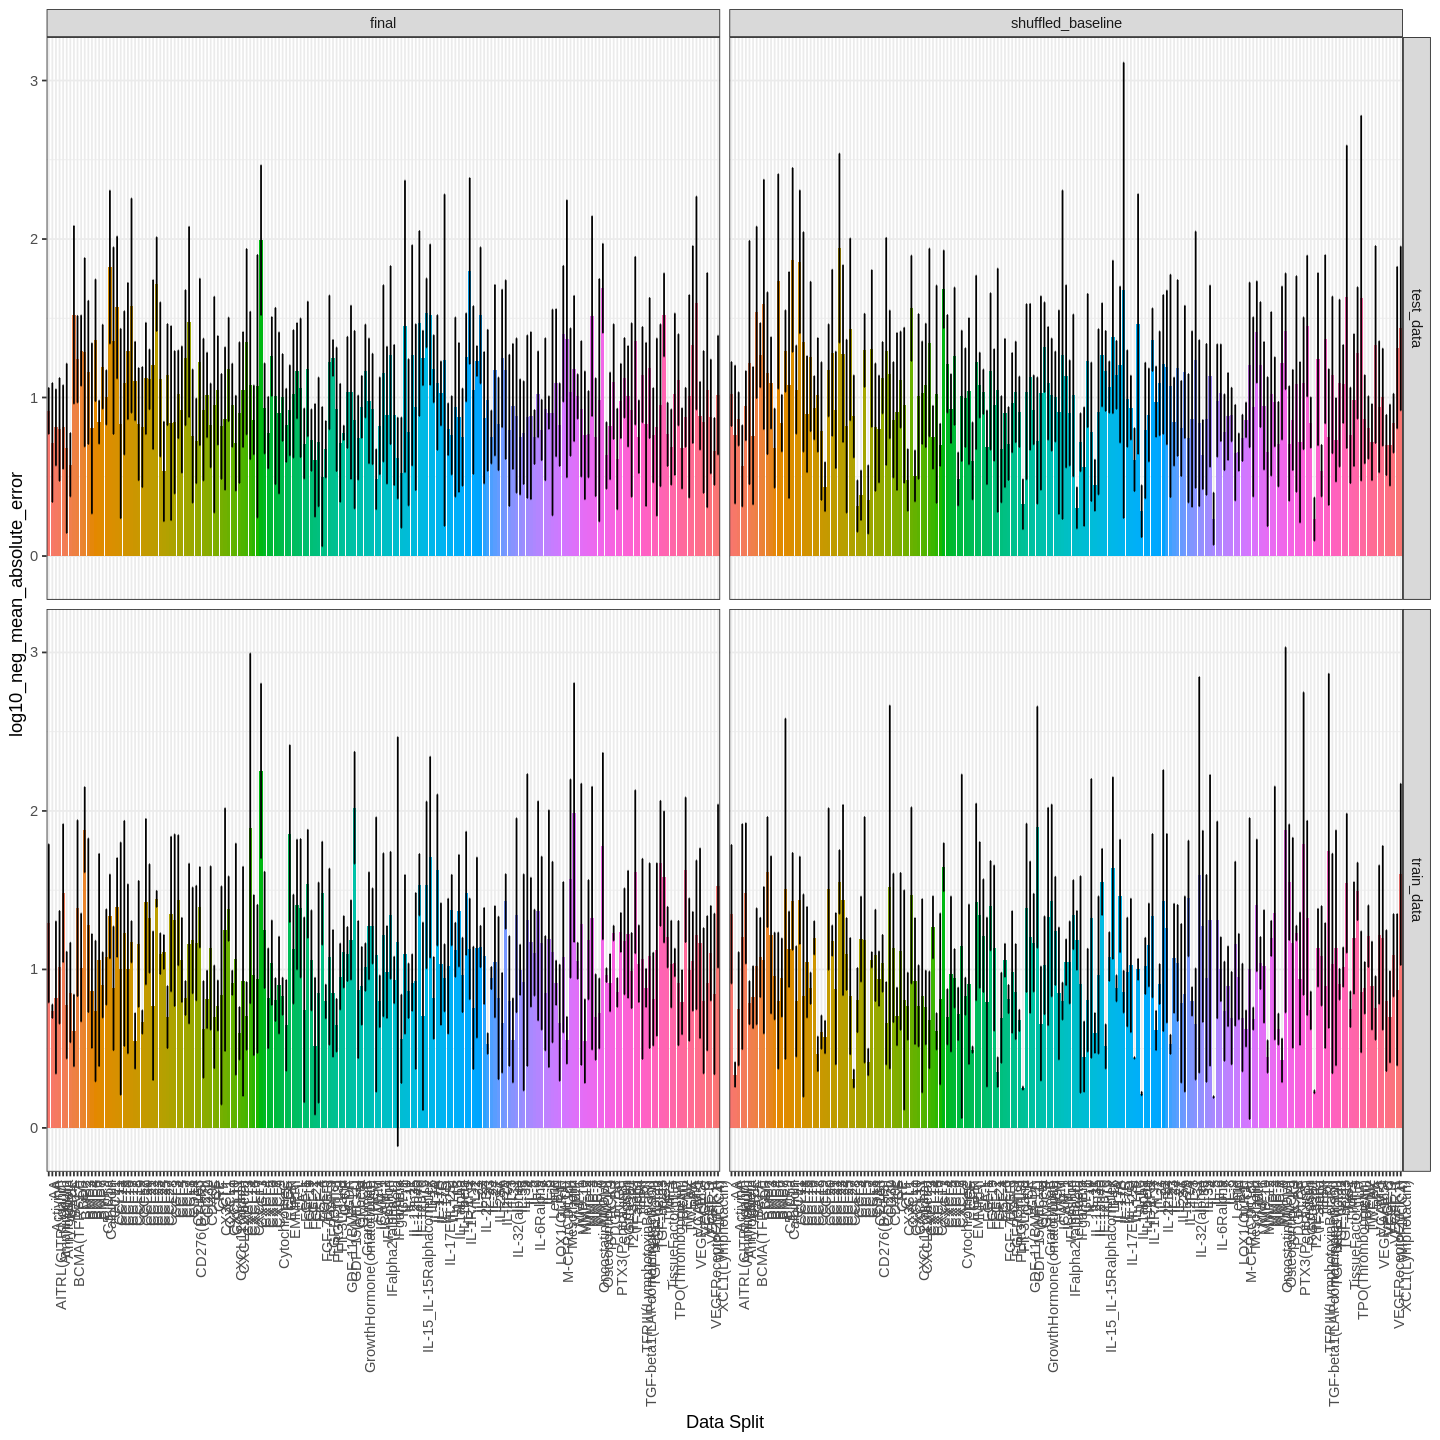

In [9]:
# set output path
prediction_metric <- "./figures/regression/PBMC/aggregated_with_nomic/DMSO_0.100_DMSO_0.025__LPS_100.000_DMSO_0.025/prediction_metric.png"
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
# set plot size
options(repr.plot.width=12, repr.plot.height=12)
# plot a bar plot of the mean log10_neg_mean_absolute_error for each data split, cytokine, and shuffle with error bars
bar_plot <- (
    ggplot(agg_df, aes(x=cytokine, y=mean_log10_neg_mean_absolute_error, fill=cytokine)) 
    + geom_bar(stat="identity", position=position_dodge()) 
    + geom_errorbar(aes(ymin=mean_log10_neg_mean_absolute_error-sd_log10_neg_mean_absolute_error, ymax=mean_log10_neg_mean_absolute_error+sd_log10_neg_mean_absolute_error), width=.2, position=position_dodge(.9)) 
    + labs(x="Data Split", y="log10_neg_mean_absolute_error") 
    + theme_bw()
    + theme(axis.text.x = element_text(angle = 90, hjust = 1))
    + facet_grid(data_split~shuffle)
    
)
# detach the legend
# get the legend from the plot
bar_plot <- bar_plot + theme(legend.position="none")
ggsave(prediction_metric, bar_plot, width=5, height=5, dpi=500)
bar_plot


In [10]:
# per cytokine graph
for ( i in 1:length(unique(agg_df$cytokine))){
    # print(unique(agg_df$cytokine)[i])
    tmp_df <- agg_df[agg_df$cytokine == unique(agg_df$cytokine)[i],]

    # set output path
    prediction_metric <- paste0("./figures/regression/PBMC/aggregated_with_nomic/DMSO_0.100_DMSO_0.025__LPS_100.000_DMSO_0.025/individual_cytokines/prediction_metric",unique(agg_df$cytokine)[i],".png")
    # if path does not exist, create it
    if (!file.exists(dirname(global_prediction_trend_path))) {
        print(dirname(global_prediction_trend_path))
        dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
    }
    # set plot size
    options(repr.plot.width=12, repr.plot.height=12)
    # plot a bar plot of the mean log10_neg_mean_absolute_error for each data split, cytokine, and shuffle with error bars
    bar_plot <- (
        ggplot(tmp_df, aes(x=data_split, y=mean_log10_neg_mean_absolute_error, fill=shuffle)) 
        + geom_bar(stat="identity", position=position_dodge()) 
        + geom_errorbar(aes(ymin=mean_log10_neg_mean_absolute_error-sd_log10_neg_mean_absolute_error, ymax=mean_log10_neg_mean_absolute_error+sd_log10_neg_mean_absolute_error), width=.2, position=position_dodge(.9)) 
        + labs(x="Data Split", y="log10_neg_mean_absolute_error") 
        + ggtitle(unique(agg_df$cytokine)[i])
        + theme_bw()
        + theme(axis.text.x = element_text(angle = 90, hjust = 1))
        
    )
    # detach the legend
    # get the legend from the plot
    ggsave(prediction_metric, bar_plot, width=5, height=5, dpi=500)
    bar_plot
}

## Make Various PlateMap Figures

Warning message:
“Warning: Invalid plate selection. The well data given ( 3740 ) has more entries then number of wells in the selected plate ( 384 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”


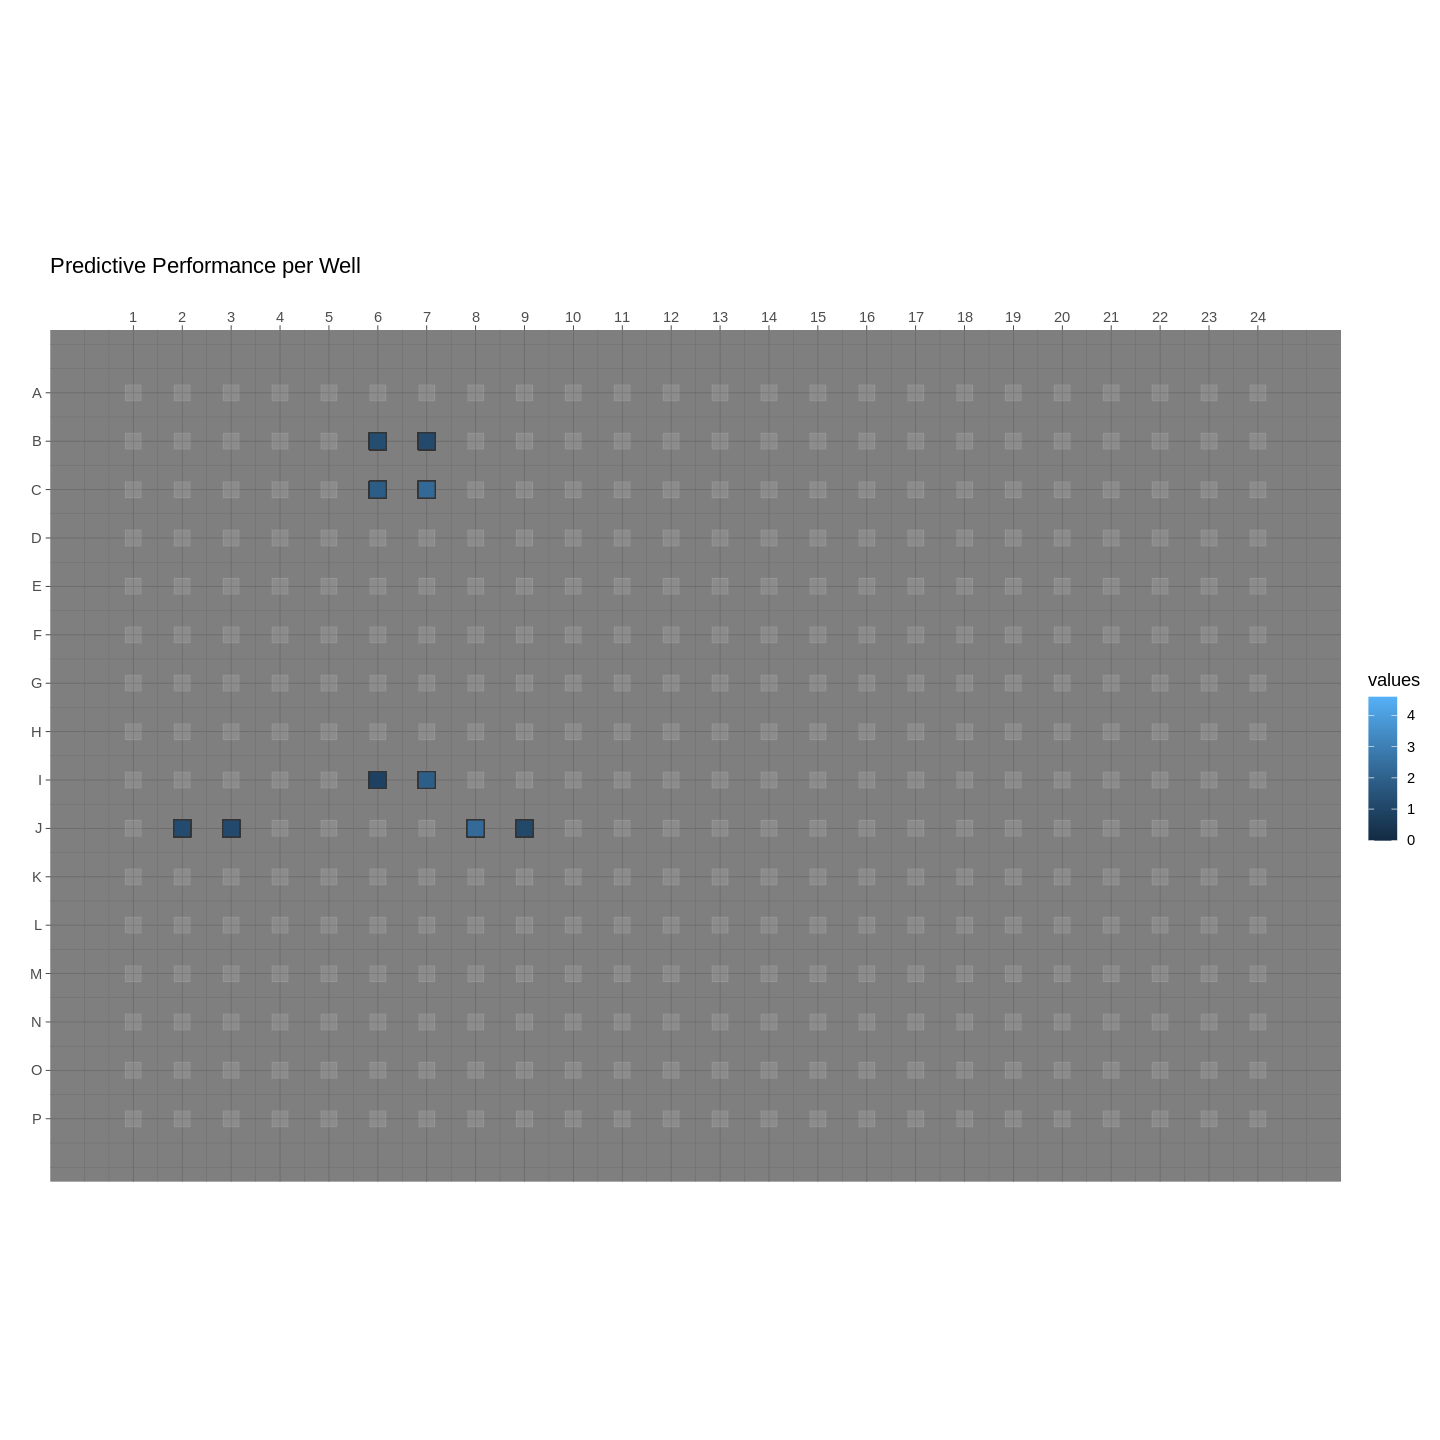

In [11]:
# predictive performance per well
# set output path
prediction_per_well_platemap <- "./figures/regression/PBMC/aggregated_with_nomic/DMSO_0.100_DMSO_0.025__LPS_100.000_DMSO_0.025/prediction_per_well_platemap.png"
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}

platemap_plot <- (
    raw_map(
        data = df$log10_neg_mean_absolute_error,
        well = df$well,
        plate = 384)
    + ggtitle("Predictive Performance per Well") 
    + theme_dark() 
)
ggsave(prediction_per_well_platemap, platemap_plot, width=5, height=5, dpi=500)
platemap_plot



In [12]:
# generate a platemap plot for the meta data
# read in the platemap data
platemap_df_path <- "../../data/Interstellar_plate2_platemap.csv"
platemap_df <- read.csv(platemap_df_path)
# if cell_type is blank, set it to "blank"
platemap_df$cell_type[platemap_df$cell_type == ""] <- "blank"
# if treatment is blank, set it to "blank"
platemap_df$inducer1[platemap_df$inducer1 == ""] <- "blank"

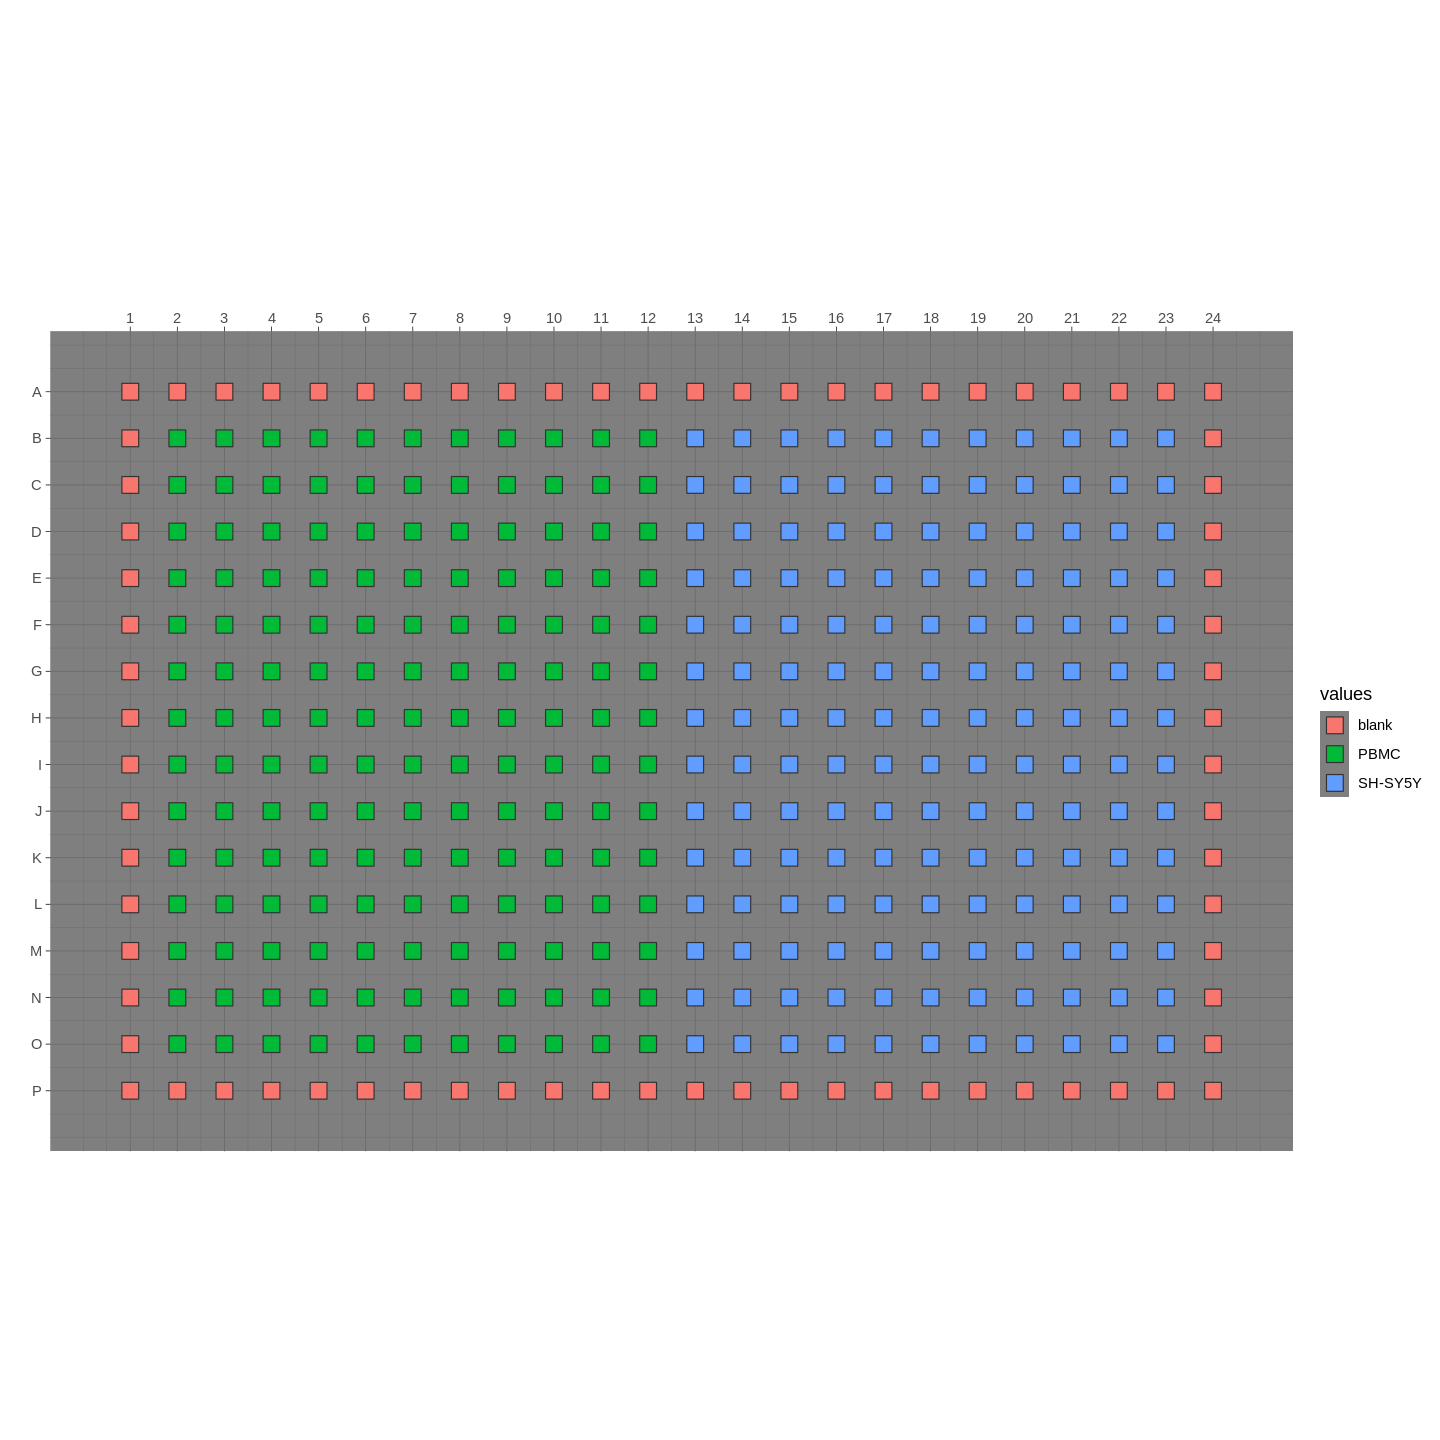

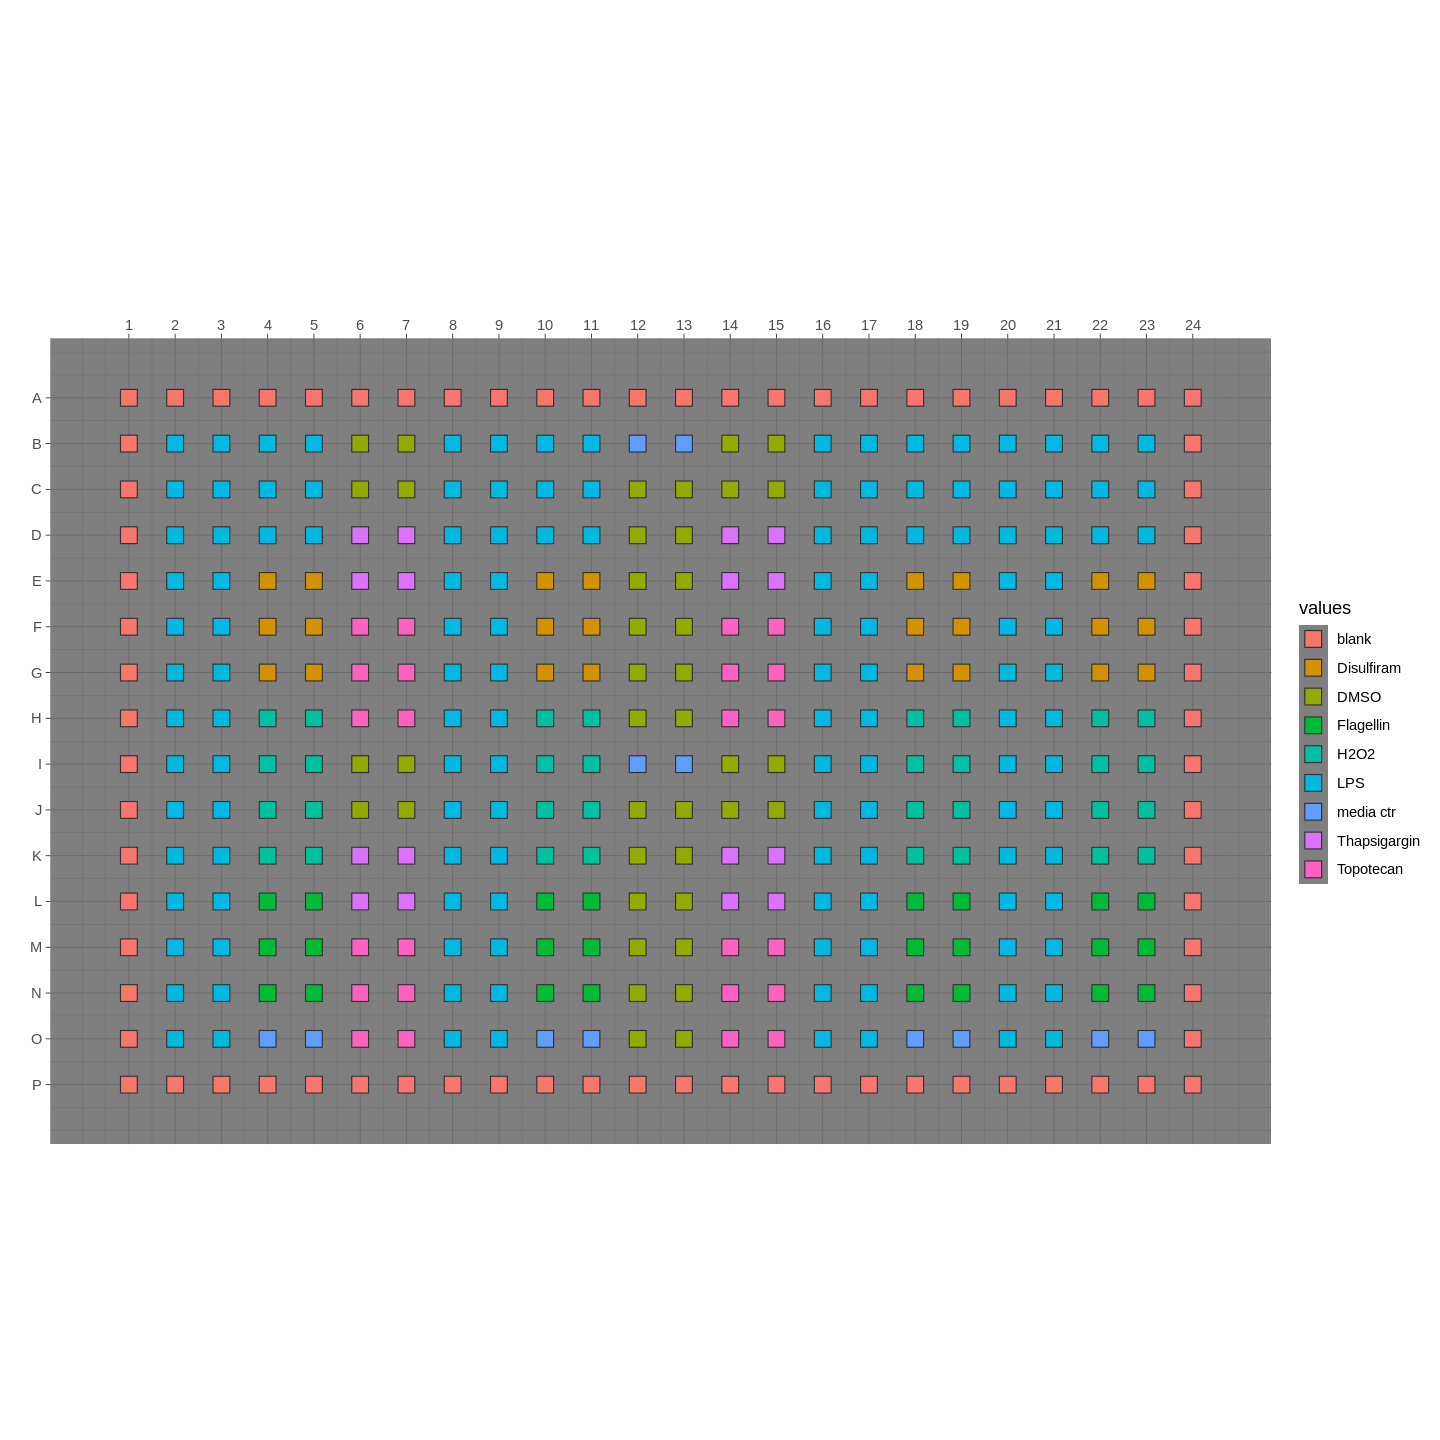

In [13]:
# platemap of experimental contitions (cell type and inducer)
cell_type_well_platemap <- "./figures/regression/PBMC/aggregated_with_nomic/DMSO_0.100_DMSO_0.025__LPS_100.000_DMSO_0.025/cell_type_well_platemap.png"
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
platemap_plot <- (
    raw_map(
        data = platemap_df$cell_type,
        well = platemap_df$well_id,
        plate = 384)
    + theme_dark() 
)
ggsave(cell_type_well_platemap, platemap_plot, width=5, height=5, dpi=500)
platemap_plot


inducer_well_platemap <- "./figures/regression/PBMC/aggregated_with_nomic/DMSO_0.100_DMSO_0.025__LPS_100.000_DMSO_0.025/inducer_well_platemap.png"
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
platemap_plot <- (
    raw_map(
        data = platemap_df$inducer1,
        well = platemap_df$well_id,
        plate = 384)
    + theme_dark() 
)
ggsave(inducer_well_platemap, platemap_plot, width=5, height=5, dpi=500)
platemap_plot